# 0. init

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import warnings
from sklearn.impute import KNNImputer
import scipy
from src.utils.memory import reduce_mem_usage

# Necessary to run src modules in the parent directory
notebook_dir = os.getcwd()  # Get the current working directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))  # Get the parent directory
sys.path.append(parent_dir)

warnings.filterwarnings('ignore')

pd.__version__, np.__version__, scipy.__version__

('2.3.1', '1.23.5', '1.10.0')

# 1. Preprocess

In [2]:
# Load data from data folder
df = pd.read_csv("../data/raw/training_data.csv", parse_dates=True)
df

,Unnamed: 0,DA_price_UK_EUR,datetime_UTC,datetime_CET,DA_price_UK_GBP,DA2_price_hourly_UK_GBP,demand_IR,demand_UK,ARPEGE_wind_UK,AROME_wind_UK,...,EURO2_solar_IR,ECMWF_solar_IR,GFS_solar_IR,SPIRE_solar_IR,HARMONIE_wind_UK,HARMONIE_solar_UK,ICONEU_wind_UK,ICONEU_solar_UK,ICONEU_wind_IR,ICONEU_solar_IR
0,31-12-2022 23:30,58.814214,31-12-2022 23:30,1-1-2023 00:30,52.00,NaN,NaN,22763.5,NaN,NaN,...,NaN,0.0000,0.0000,NaN,NaN,0.0000,NaN,0.0,NaN,0.0
1,1-1-2023 00:30,67.862555,1-1-2023 00:30,1-1-2023 01:30,60.00,41.550,3941.257,20565.0,13554.061000,13354.07910,...,0.0000,0.0000,0.0000,NaN,17011.30755,0.0000,14388.68295,0.0,1271.4708,0.0
2,1-1-2023 01:30,55.986608,1-1-2023 01:30,1-1-2023 02:30,49.50,37.500,3787.143,19871.5,13926.815050,13666.28165,...,0.0000,0.0000,0.0000,NaN,17080.39970,0.0000,14072.37565,0.0,986.5683,0.0
3,1-1-2023 02:30,20.358766,1-1-2023 02:30,1-1-2023 03:30,18.00,18.250,3607.336,17977.5,13427.848550,13323.50220,...,0.0000,0.0000,0.0000,NaN,16686.11905,0.0000,13852.11245,0.0,825.5056,0.0
4,1-1-2023 03:30,0.000000,1-1-2023 03:30,1-1-2023 04:30,0.00,-6.850,3471.381,16917.0,12879.295000,13581.71050,...,0.0000,0.0000,0.0000,NaN,16060.91155,0.0000,14175.07555,0.0,689.6008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,21-7-2025 18:30,NaN,21-7-2025 18:30,21-7-2025 20:30,103.50,110.270,5152.000,27641.0,4838.478750,4814.54205,...,23.2388,10.8860,5.0407,1.6277,4744.41560,563.6635,NaN,NaN,NaN,NaN
22388,21-7-2025 19:30,NaN,21-7-2025 19:30,21-7-2025 21:30,102.10,107.020,5008.000,26716.5,4959.294650,4994.74805,...,9.4200,0.0006,3.9898,0.0307,5088.08175,54.5923,NaN,NaN,NaN,NaN
22389,21-7-2025 20:30,NaN,21-7-2025 20:30,21-7-2025 22:30,93.72,93.350,4860.500,25198.0,5244.485800,5318.93135,...,0.0000,0.0000,0.0000,0.0000,5050.25860,NaN,NaN,NaN,NaN,NaN
22390,21-7-2025 21:30,NaN,21-7-2025 21:30,21-7-2025 23:30,83.70,81.295,4639.000,22562.5,5745.867956,5562.25555,...,0.0000,0.0000,0.0000,0.0000,5213.96025,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns, df.shape

(Index(['Unnamed: 0', 'DA_price_UK_EUR', 'datetime_UTC', 'datetime_CET',
        'DA_price_UK_GBP', 'DA2_price_hourly_UK_GBP', 'demand_IR', 'demand_UK',
        'ARPEGE_wind_UK', 'AROME_wind_UK', 'EURO10_wind_UK', 'EURO2_wind_UK',
        'ECMWF_wind_UK', 'GFS_wind_UK', 'SPIRE_wind_UK', 'ARPEGE_solar_UK',
        'AROME_solar_UK', 'EURO10_solar_UK', 'EURO2_solar_UK', 'ECMWF_solar_UK',
        'GFS_solar_UK', 'SPIRE_solar_UK', 'ARPEGE_wind_IR', 'AROME_wind_IR',
        'EURO10_wind_IR', 'EURO2_wind_IR', 'ECMWF_wind_IR', 'GFS_wind_IR',
        'SPIRE_wind_IR', 'ARPEGE_solar_IR', 'AROME_solar_IR', 'EURO10_solar_IR',
        'EURO2_solar_IR', 'ECMWF_solar_IR', 'GFS_solar_IR', 'SPIRE_solar_IR',
        'HARMONIE_wind_UK', 'HARMONIE_solar_UK', 'ICONEU_wind_UK',
        'ICONEU_solar_UK', 'ICONEU_wind_IR', 'ICONEU_solar_IR'],
       dtype='object'),
 (22392, 42))

In [4]:
def generate_datetime_series(start_date, periods, freq):
    return pd.Series(pd.date_range(start=start_date, periods=periods, freq=freq))

# Generate datetime series with hourly frequency that starts at 31-12-2022 23:30:00
date_rng = generate_datetime_series('31-12-2022 23:30:00', 933*24, 'h')

# Check if datetime_UTC column is valid by comparing it with the generated date_rng
df['datetime_UTC'] = pd.to_datetime(df['datetime_UTC'], dayfirst=True)
df['datetime_UTC'].equals(date_rng)

True

In [5]:
# remove first and third column
# just use datetime_UTC for time
# drop DA_price_UK_EUR column because irrelevant for DA->DA2 price spread
df = df.drop(columns=['Unnamed: 0', 'datetime_CET', 'DA_price_UK_EUR'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime_UTC             22392 non-null  datetime64[ns]
 1   DA_price_UK_GBP          22391 non-null  float64       
 2   DA2_price_hourly_UK_GBP  22390 non-null  float64       
 3   demand_IR                22390 non-null  float64       
 4   demand_UK                22335 non-null  float64       
 5   ARPEGE_wind_UK           21591 non-null  float64       
 6   AROME_wind_UK            21075 non-null  float64       
 7   EURO10_wind_UK           22003 non-null  float64       
 8   EURO2_wind_UK            22003 non-null  float64       
 9   ECMWF_wind_UK            22294 non-null  float64       
 10  GFS_wind_UK              22349 non-null  float64       
 11  SPIRE_wind_UK            19594 non-null  float64       
 12  ARPEGE_solar_UK          21608 n

In [6]:
# Reduce memory usage of the dataframe
df = reduce_mem_usage(df)

Mem. usage decreased to  1.79 Mb (73.1% reduction)


In [7]:
imputer = KNNImputer(n_neighbors=4)
df_imputed = imputer.fit_transform(df.iloc[:, 1:])

In [8]:
# Create a new DataFrame with the imputed values, keep the original index and first column
df_imputed = pd.DataFrame(df_imputed, index=df.index, columns=df.columns[1:])
# Add the datetime_UTC column back to the imputed DataFrame
df_imputed.insert(0, 'datetime_UTC', df['datetime_UTC'])

df_imputed.head()

,datetime_UTC,DA_price_UK_GBP,DA2_price_hourly_UK_GBP,demand_IR,demand_UK,ARPEGE_wind_UK,AROME_wind_UK,EURO10_wind_UK,EURO2_wind_UK,ECMWF_wind_UK,...,EURO2_solar_IR,ECMWF_solar_IR,GFS_solar_IR,SPIRE_solar_IR,HARMONIE_wind_UK,HARMONIE_solar_UK,ICONEU_wind_UK,ICONEU_solar_UK,ICONEU_wind_IR,ICONEU_solar_IR
0,2022-12-31 23:30:00,52.0,41.656250,3920.0,22768.0,12768.0,12520.0,11424.0,13648.0,13080.0,...,0.0,0.0,0.0,0.0,13496.0,0.0,10528.0,0.0,2544.0,0.0
1,2023-01-01 00:30:00,60.0,41.562500,3942.0,20560.0,13552.0,13352.0,15464.0,19056.0,15800.0,...,0.0,0.0,0.0,0.0,17008.0,0.0,14392.0,0.0,1271.0,0.0
2,2023-01-01 01:30:00,49.5,37.500000,3788.0,19872.0,13928.0,13664.0,15616.0,18784.0,15696.0,...,0.0,0.0,0.0,0.0,17088.0,0.0,14072.0,0.0,986.5,0.0
3,2023-01-01 02:30:00,18.0,18.250000,3608.0,17984.0,13424.0,13320.0,15432.0,18144.0,15384.0,...,0.0,0.0,0.0,0.0,16688.0,0.0,13856.0,0.0,825.5,0.0
4,2023-01-01 03:30:00,0.0,-6.851562,3472.0,16912.0,12880.0,13584.0,15304.0,17264.0,14792.0,...,0.0,0.0,0.0,0.0,16064.0,0.0,14176.0,0.0,689.5,0.0


In [9]:
# check null values 
df_imputed.isnull().sum().sort_values(ascending=False)

datetime_UTC               0
EURO2_solar_IR             0
EURO2_wind_IR              0
ECMWF_wind_IR              0
GFS_wind_IR                0
SPIRE_wind_IR              0
ARPEGE_solar_IR            0
AROME_solar_IR             0
EURO10_solar_IR            0
ECMWF_solar_IR             0
AROME_wind_IR              0
GFS_solar_IR               0
SPIRE_solar_IR             0
HARMONIE_wind_UK           0
HARMONIE_solar_UK          0
ICONEU_wind_UK             0
ICONEU_solar_UK            0
ICONEU_wind_IR             0
EURO10_wind_IR             0
ARPEGE_wind_IR             0
DA_price_UK_GBP            0
ECMWF_wind_UK              0
DA2_price_hourly_UK_GBP    0
demand_IR                  0
demand_UK                  0
ARPEGE_wind_UK             0
AROME_wind_UK              0
EURO10_wind_UK             0
EURO2_wind_UK              0
GFS_wind_UK                0
SPIRE_solar_UK             0
SPIRE_wind_UK              0
ARPEGE_solar_UK            0
AROME_solar_UK             0
EURO10_solar_U

In [10]:
# create target variable which is difference between DA_price_UK_GBP and DA2_price_hourly_UK_GBP
df_imputed['target'] = df_imputed['DA_price_UK_GBP'] - df_imputed['DA2_price_hourly_UK_GBP']

# remove DA2_price_hourly_UK_GBP to avoid data leakage
df_imputed = df_imputed.drop(columns=['DA2_price_hourly_UK_GBP'])

df_imputed['target'].isnull().sum()

0

In [11]:
df_imputed.head()

# Save the imputed DataFrame to a new CSV file, make sure to pick a distinctive name
# For the name use, today's date and time, number of variables, length of dataset, imputation technique
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')
num_variables = df_imputed.shape[1]
length_dataset = df_imputed.shape[0]
filename = f"imputed_training_data_{timestamp}_vars_{num_variables}_len_{length_dataset}_knn.csv"
df_imputed.to_csv(f"../data/processed/{filename}", index=False)

# 3. Feature Engineering

# Intermezzo

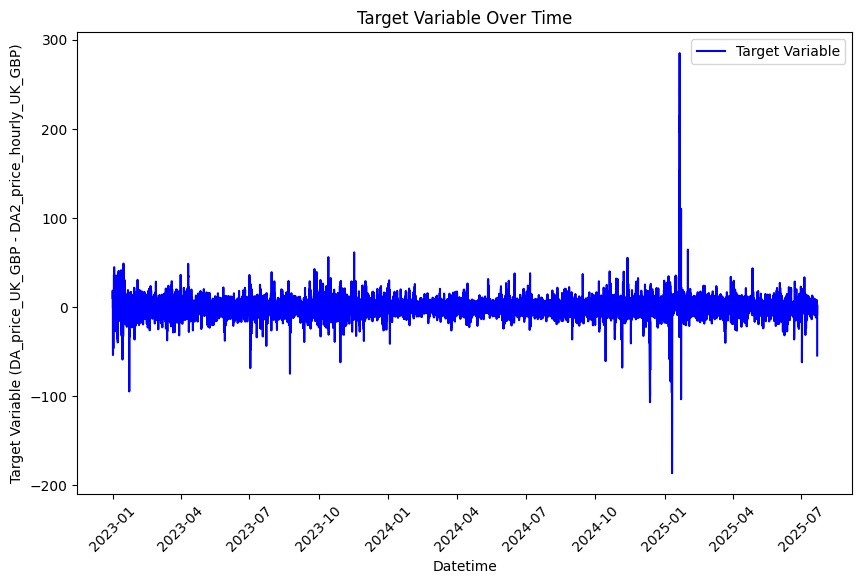

In [12]:
import matplotlib.pyplot as plt
# Plot the target variable to visualize the distribution
plt.figure(figsize=(10, 6))
plt.plot(df_imputed['datetime_UTC'], df_imputed['target'], label='Target Variable', color='blue')
plt.title('Target Variable Over Time')
plt.xlabel('Datetime')
plt.ylabel('Target Variable (DA_price_UK_GBP - DA2_price_hourly_UK_GBP)')
plt.xticks(rotation=45)
plt.legend()

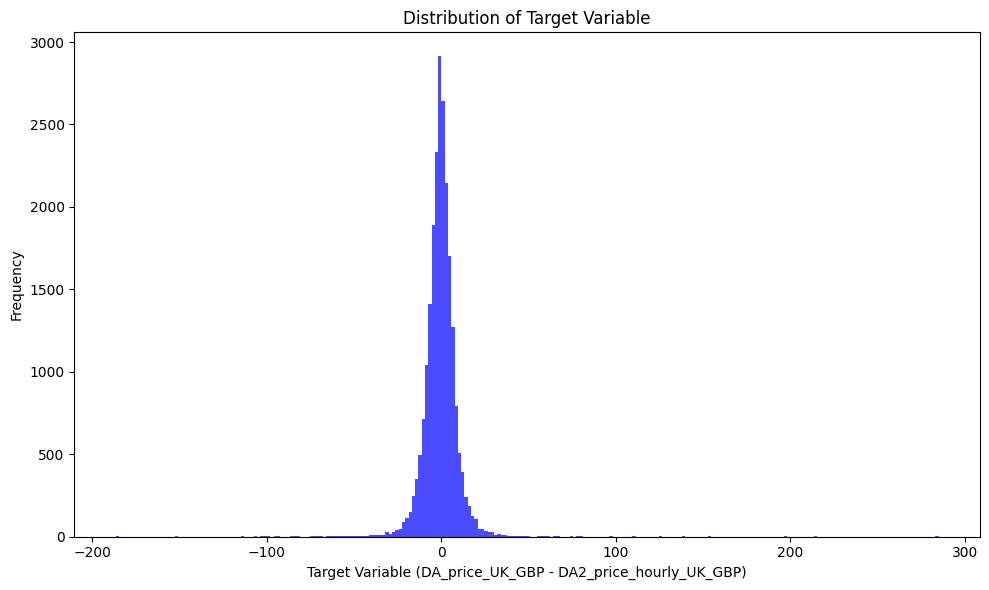

In [43]:
# also make distribution plot of target variable
plt.figure(figsize=(10, 6))
plt.hist(df_imputed['target'], bins=250, color='blue', alpha=0.7)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable (DA_price_UK_GBP - DA2_price_hourly_UK_GBP)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Modelling

In [13]:
X = df_imputed.drop(columns=['datetime_UTC', 'target'])
y = df_imputed.target

## Probabilistic

### SKLearn QuantileRegressor 

In [61]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver='highs-ds')
    y_pred = qr.fit(X, y).predict(X)
    predictions[quantile] = y_pred

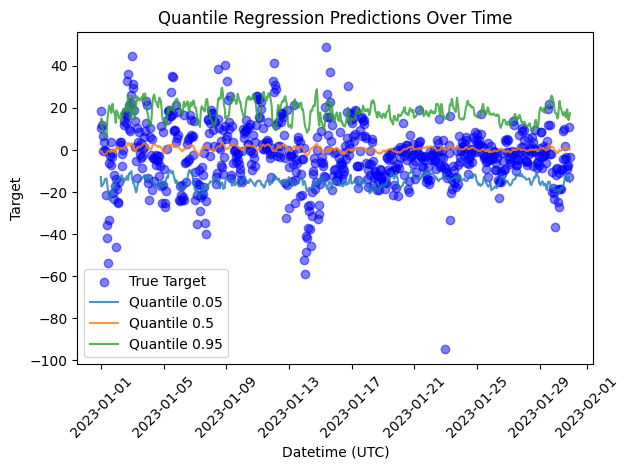

In [60]:
plot_df = df_imputed.iloc[:24*30, :]
X = plot_df['datetime_UTC']
y = plot_df['target']

plt.scatter(X, y, color='blue', label='True Target', alpha=0.5)

for quantile in quantiles:
    y_pred = predictions[quantile][:24*30]
    plt.plot(X, y_pred, label=f'Quantile {quantile}', alpha=0.8)

# Step 4: Add labels and legend
plt.xlabel('Datetime (UTC)')
plt.ylabel('Target')
plt.title('Quantile Regression Predictions Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate datetime labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Point